# FIFA 20 Player Analysis

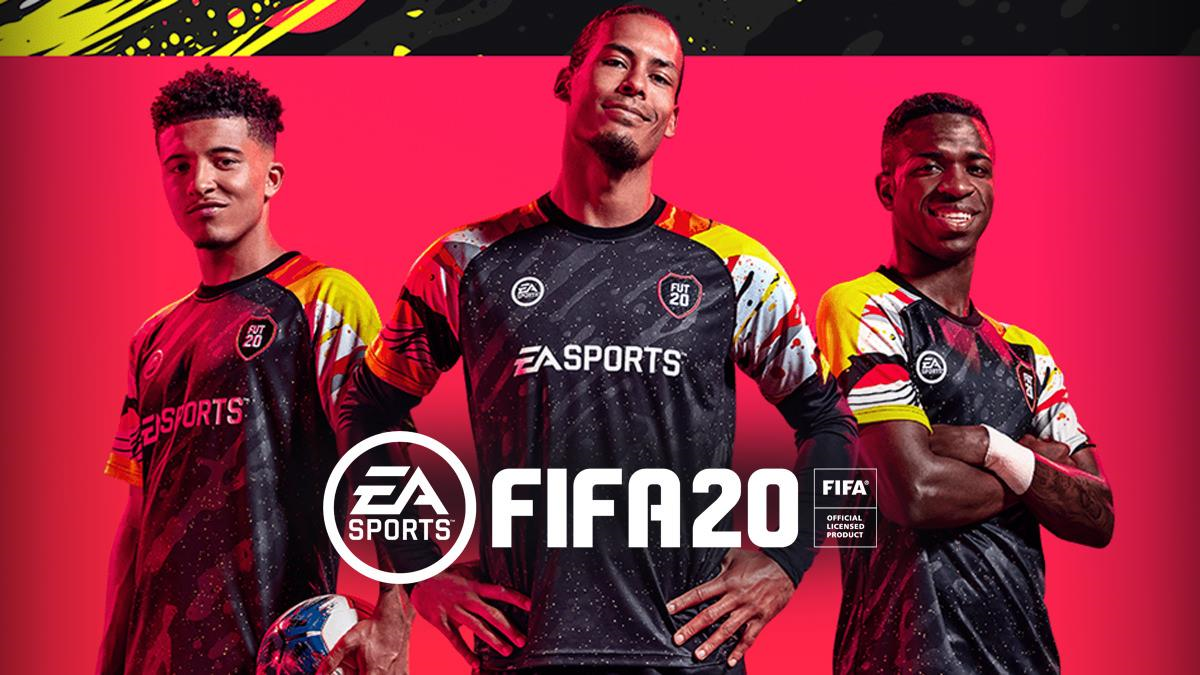

In this project, we will see some of the player analysis. The project will help you understand the various aspect of FIFA 20 and wil be able to place out the particular player's data as per your need. 

We have imported all the necessary library that will be needed  in the project.
We have also imported the The FIFA 20 player data from a player_data.csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)
pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 30)
df=pd.read_csv(r'C:\Users\Shloka Daga SD03\Documents\players_data.csv')
df.head()
plt.style.use('ggplot')

The below part provides information about mean,min,max,count values for different Columns that contain integer values

In [2]:
df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.300000e+04,1.000000,2019.000000,1.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,5.630000e+05,9.000000,2020.000000,6.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,1.200000e+06,17.000000,2021.000000,12.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,3.000000,3.700000e+06,27.000000,2022.000000,18.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,5.000000,1.958000e+08,99.000000,2026.000000,30.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


The following are the columns of our Dataset

In [3]:
df.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob', 'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], dtype='object', length=104)

1. We will rename the columns to a proper Name, so that they are easily readable and can be used later for the analys
2. We will create  a new Dataframe containing all the columns that we will require in the further part of the project.

In [4]:
df.rename(columns={'sofifa_id':'id','short_name':'Name','nationality':'Nationality','club':'Club','age':'Age',
                   'overall':'Overall','player_positions':'Player Positions','preferred_foot':'Preferred Foot',
                   'value_eur':'Value','wage_eur':'Wage','work_rate':'Work Rate','international_reputation':'International Reputation',
                   'skill_moves':'Skill Moves','team_position':'Team Position','skill_fk_accuracy':'Free Kick'},inplace=True)
df.drop('player_url',axis=1,inplace=True)
df_new=df[['Name','Nationality','Club','Age','Overall','Player Positions','Preferred Foot','Value','Wage','Work Rate','International Reputation','Skill Moves','Team Position','Free Kick','pace','shooting','passing','dribbling','defending','physic']]
df_new.head()

,Name,Nationality,Club,Age,Overall,Player Positions,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Team Position,Free Kick,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,Argentina,FC Barcelona,32,94,"RW, CF, ST",Left,95500000,565000,Medium/Low,5,4,RW,94,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,Portugal,Juventus,34,93,"ST, LW",Right,58500000,405000,High/Low,5,5,LW,76,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,Brazil,Paris Saint-Germain,27,92,"LW, CAM",Right,105500000,290000,High/Medium,5,5,CAM,87,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,Slovenia,Atlético Madrid,26,91,GK,Right,77500000,125000,Medium/Medium,3,1,GK,14,NaN,NaN,NaN,NaN,NaN,NaN
4,E. Hazard,Belgium,Real Madrid,28,91,"LW, CF",Right,90000000,470000,High/Medium,4,4,LW,79,91.0,83.0,86.0,94.0,35.0,66.0


There is altogether 18278 rows and 20 columns

In [5]:
df_new.shape

(18278, 20)

In [6]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Name                      18278 non-null  object 
 1   Nationality               18278 non-null  object 
 2   Club                      18278 non-null  object 
 3   Age                       18278 non-null  int64  
 4   Overall                   18278 non-null  int64  
 5   Player Positions          18278 non-null  object 
 6   Preferred Foot            18278 non-null  object 
 7   Value                     18278 non-null  int64  
 8   Wage                      18278 non-null  int64  
 9   Work Rate                 18278 non-null  object 
 10  International Reputation  18278 non-null  int64  
 11  Skill Moves               18278 non-null  int64  
 12  Team Position             18038 non-null  object 
 13  Free Kick                 18278 non-null  int64  
 14  pace  

Now, we will try to figure out how much data is missing in our Project.

In [7]:
df_new.isnull().sum()

Name                           0
Nationality                    0
Club                           0
Age                            0
Overall                        0
Player Positions               0
Preferred Foot                 0
Value                          0
Wage                           0
Work Rate                      0
International Reputation       0
Skill Moves                    0
Team Position                240
Free Kick                      0
pace                        2036
shooting                    2036
passing                     2036
dribbling                   2036
defending                   2036
physic                      2036
dtype: int64

One of the important part of Data Science is Data Cleaning. One of the  things that Data Cleaning includes is managing 
Null values or Missing values. In this case, we will replace Null value with either the median value of the respective 
columns or by a specified value.

In [8]:
df_new['Team Position'].fillna('unknown',inplace=True)
df_new['pace'].fillna(df_new['pace'].median(),inplace=True)
df_new['shooting'].fillna(df_new['shooting'].median(),inplace=True)
df_new['passing'].fillna(df_new['passing'].median(),inplace=True)
df_new['dribbling'].fillna(df_new['dribbling'].median(),inplace=True)
df_new['defending'].fillna(df_new['defending'].median(),inplace=True)
df_new['physic'].fillna(df_new['physic'].median(),inplace=True)

C:\Users\Shloka Daga SD03\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Now, we can see that there are no missing values in our Dataframe

In [9]:
df_new.isnull().sum()

Name                        0
Nationality                 0
Club                        0
Age                         0
Overall                     0
Player Positions            0
Preferred Foot              0
Value                       0
Wage                        0
Work Rate                   0
International Reputation    0
Skill Moves                 0
Team Position               0
Free Kick                   0
pace                        0
shooting                    0
passing                     0
dribbling                   0
defending                   0
physic                      0
dtype: int64

## Skill Move

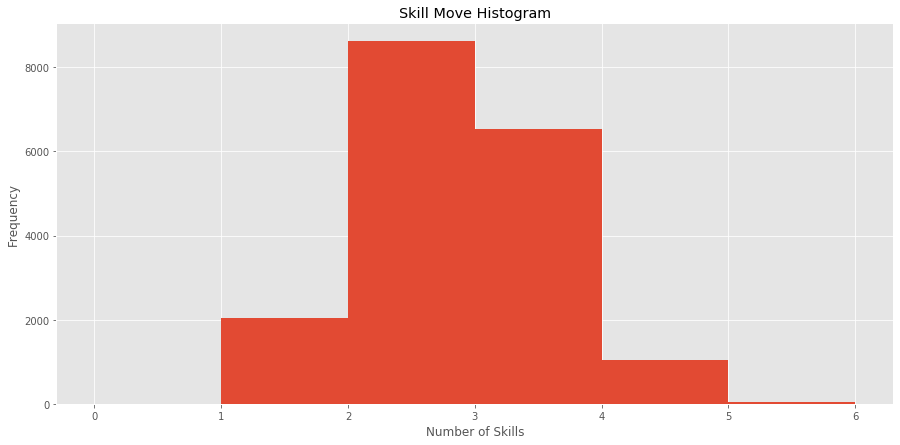

In [10]:
plt.figure(figsize=(15, 7))
df_new['Skill Moves'].plot(kind='hist',bins=[0,1,2,3,4,5,6])
plt.xlabel('Number of Skills')
plt.title('Skill Move Histogram')
plt.show()

We can see that the most of the players have 2 Skils.

## International Reputation

In [11]:
df_new.loc[df_new['International Reputation']==5]

,Name,Nationality,Club,Age,Overall,Player Positions,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Team Position,Free Kick,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,Argentina,FC Barcelona,32,94,"RW, CF, ST",Left,95500000,565000,Medium/Low,5,4,RW,94,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,Portugal,Juventus,34,93,"ST, LW",Right,58500000,405000,High/Low,5,5,LW,76,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,Brazil,Paris Saint-Germain,27,92,"LW, CAM",Right,105500000,290000,High/Medium,5,5,CAM,87,91.0,85.0,87.0,95.0,32.0,58.0
19,L. Suárez,Uruguay,FC Barcelona,32,89,ST,Right,53000000,355000,High/Medium,5,3,ST,82,73.0,89.0,80.0,84.0,51.0,84.0
31,M. Neuer,Germany,FC Bayern München,33,88,GK,Right,32000000,155000,Medium/Medium,5,1,GK,11,69.0,54.0,58.0,64.0,56.0,66.0
96,Z. Ibrahimović,Sweden,LA Galaxy,37,85,ST,Right,14000000,15000,Medium/Low,5,5,ST,78,56.0,88.0,77.0,77.0,34.0,78.0


## Pace

In [12]:
speed=df_new.sort_values(by=['pace'],ascending=False).head(10)

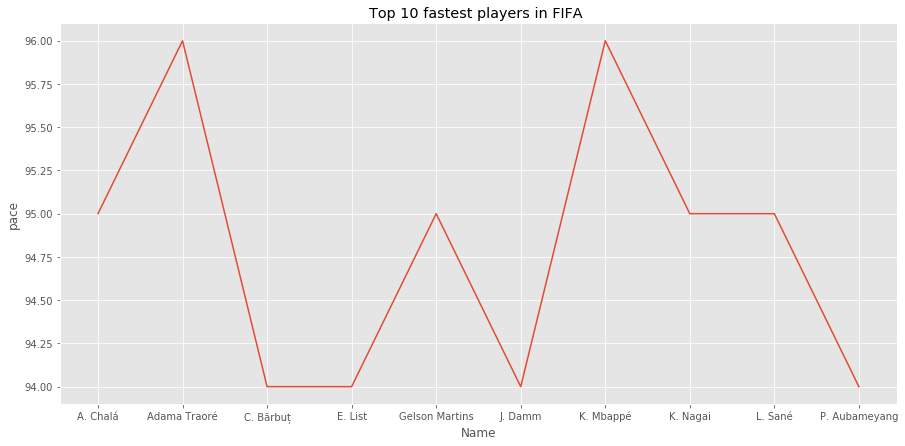

In [13]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Name',y='pace',data=speed)
plt.title('Top 10 fastest players in FIFA ')
plt.show()

## Free Kick

In [14]:
fk=df_new.sort_values(by=['Free Kick'],ascending=False).head(10)

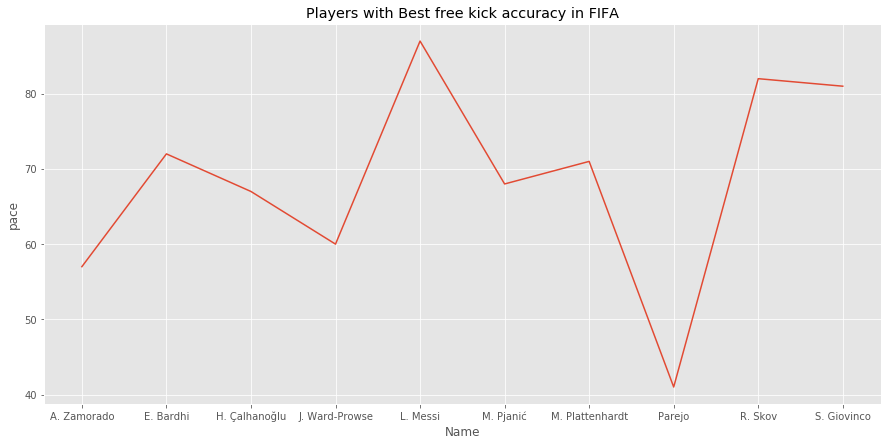

In [15]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Name',y='pace',data=fk)
plt.title('Players with Best free kick accuracy in FIFA')
plt.show()

## Passing

In [16]:
passing=df_new.sort_values(by=['passing'],ascending=False).head(10)

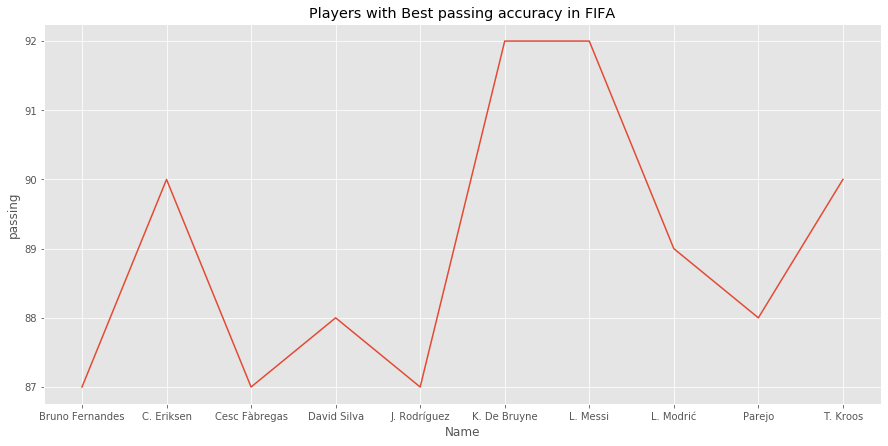

In [17]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Name',y='passing',data=passing)
plt.title('Players with Best passing accuracy in FIFA')
plt.show()

## Preferred Foot

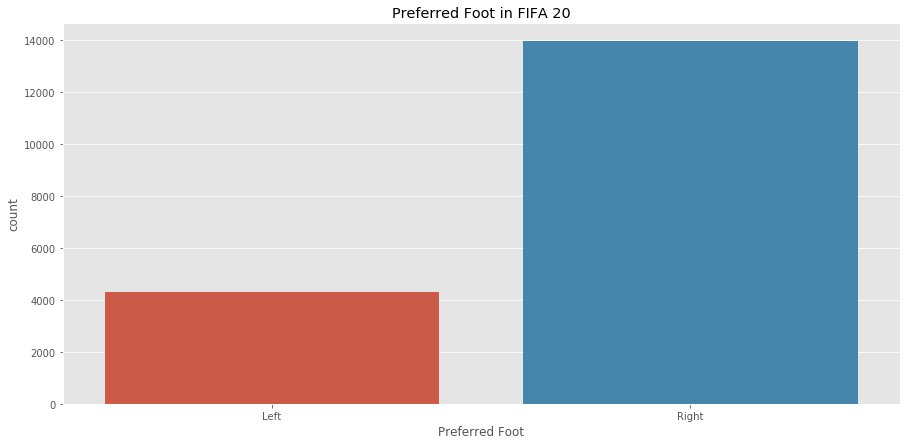

In [18]:
plt.figure(figsize=(15,7))
sns.countplot(df_new['Preferred Foot'])
plt.title('Preferred Foot in FIFA 20')
plt.show()

In [19]:
prefferedfoot=df_new.groupby('Preferred Foot')['Preferred Foot'].count()
prefferedfoot

Preferred Foot
Left      4318
Right    13960
Name: Preferred Foot, dtype: int64

In the above figure, we can see that most of the player preferred foot is Right

## Player Position

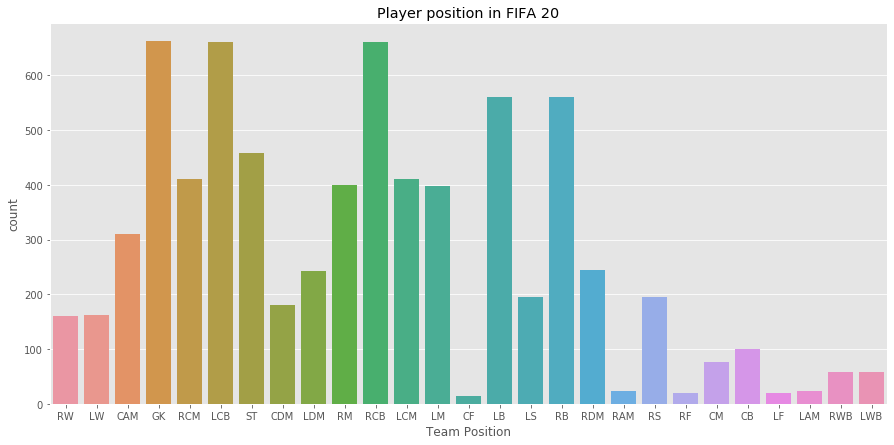

In [20]:
plt.figure(figsize=(15,7))
df_count=df.drop(df[(df['Team Position']=='SUB') | (df['Team Position']=='RES')].index)
sns.countplot(df_count['Team Position'])
plt.title('Player position in FIFA 20')
plt.show()

The above figure shows the distribution of different Player's Position in FIFA 20.

In [21]:
pos=df_count.groupby('Team Position')['Team Position'].count()
pos

Team Position
CAM    311
CB     100
CDM    181
CF      14
CM      76
GK     662
LAM     23
LB     560
LCB    660
LCM    411
LDM    242
LF      19
LM     398
LS     195
LW     162
LWB     58
RAM     23
RB     560
RCB    660
RCM    411
RDM    244
RF      19
RM     399
RS     195
RW     161
RWB     58
ST     458
Name: Team Position, dtype: int64

In [22]:
df_count['Team Position'].unique()

array(['RW', 'LW', 'CAM', 'GK', 'RCM', 'LCB', 'ST', 'CDM', 'LDM', 'RM',
       'RCB', 'LCM', 'LM', 'CF', 'LB', 'LS', 'RB', 'RDM', 'RAM', 'RS',
       'RF', 'CM', 'CB', 'LF', 'LAM', nan, 'RWB', 'LWB'], dtype=object)

## Generalized Positions

We will categorize the player into 4 types:
1. Attacker as ATK
2. Mid-Fielder as MID
3. Defenders as DEF
4. GoalKeeper as GK

In [23]:
conditions=[(df_count['Team Position'] == 'RF') | (df_count['Team Position'] == 'ST') | (df_count['Team Position'] == 'LW') | (
        df_count['Team Position'] == 'LF') | (df_count['Team Position'] == 'RS') | (df_count['Team Position'] == 'LS') | (
        df_count['Team Position'] == 'RW') | (df_count['Team Position'] == 'CF')
, (df_count['Team Position'] == 'RCM') | (df_count['Team Position'] == 'LCM') | (df_count['Team Position'] == 'LDM') | (
        df_count['Team Position'] == 'CAM') | (df_count['Team Position'] == 'CDM') | (df_count['Team Position'] == 'RM') | (
          df_count['Team Position'] == 'LAM') | (df_count['Team Position'] == 'LM') | (df_count['Team Position'] == 'RDM') & (
          df_count['Team Position'] == 'CM') | (df_count['Team Position'] == 'RAM')
, (df_count['Team Position'] == 'RCB') | (df_count['Team Position'] == 'CB') | (df_count['Team Position'] == 'LCB') | (
        df_count['Team Position'] == 'LB') | (df_count['Team Position'] == 'RB') | (df_count['Team Position'] == 'LWB') | (
          df_count['Team Position'] == 'RWB')
, (df_count['Team Position'] == 'GK')]
types=['ATK','MID','DEF','GK']
df_count['General Position']=np.select(conditions,types,default='unknown')
df_count[['Name','Team Position','General Position']]

,Name,Team Position,General Position
0,L. Messi,RW,ATK
1,Cristiano Ronaldo,LW,ATK
2,Neymar Jr,CAM,MID
3,J. Oblak,GK,GK
4,E. Hazard,LW,ATK
...,...,...,...
18149,Yang Guoyuan,RCM,MID
18153,Yeljan Shinar,RB,DEF
18155,M. Kouogun,RCB,DEF
18182,J. White,LB,DEF


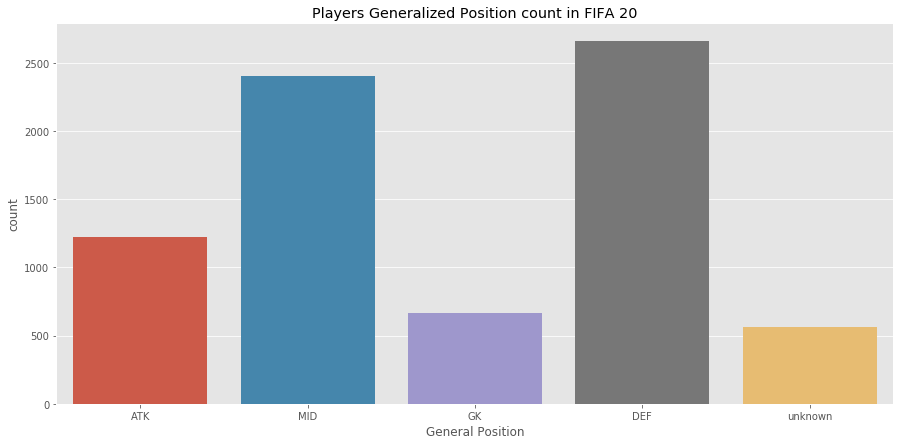

In [24]:
plt.figure(figsize=(15,7))
sns.countplot(df_count['General Position'])
plt.title('Players Generalized Position count in FIFA 20')
plt.show()

The following figures show the TOP 10 Attackers, Mid-Fielders, Defenders, GoalKeeper 

In [25]:
def top10_players(pos,role):
    plt.figure(figsize=(15,7))
    pos=df_count.loc[df_count['General Position']==pos]
    pos=pos.sort_values(by='Value',ascending=False).head(10)
    sns.barplot(pos['Name'],pos['Value'])
    plt.title('Top 10 '+role+' according to their market value')
    plt.show()

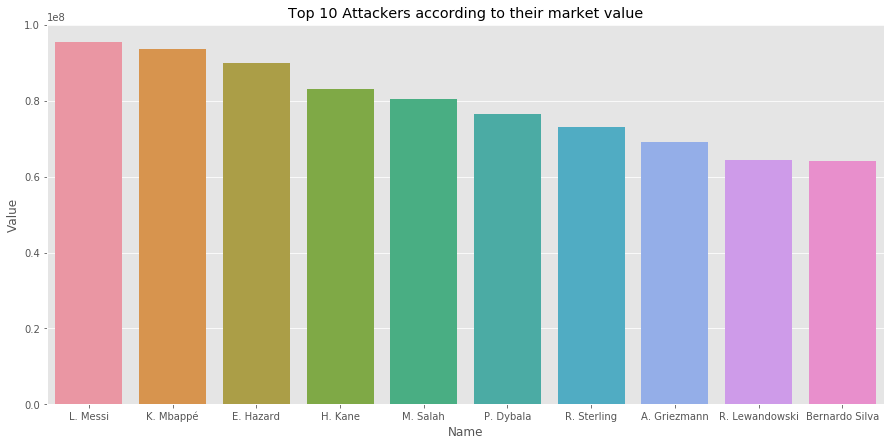

In [26]:
top10_players('ATK','Attackers')

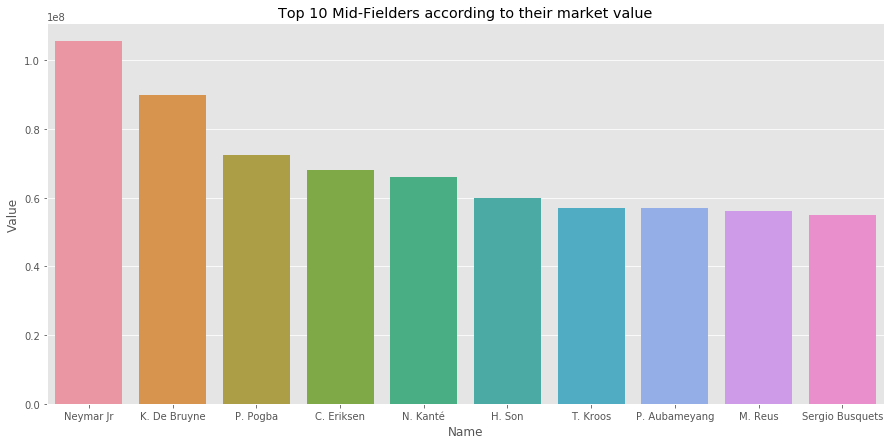

In [27]:
top10_players('MID','Mid-Fielders')

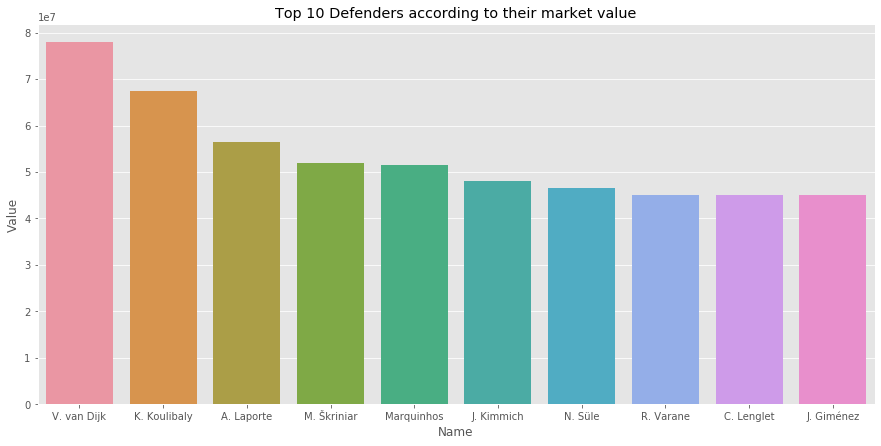

In [28]:
top10_players('DEF','Defenders')

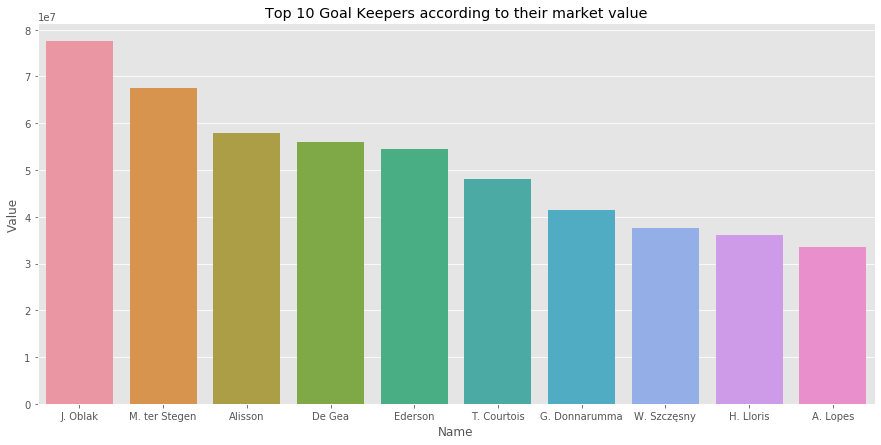

In [29]:
top10_players('GK','Goal Keepers')

## Relation between Player's Age and their Work Rate

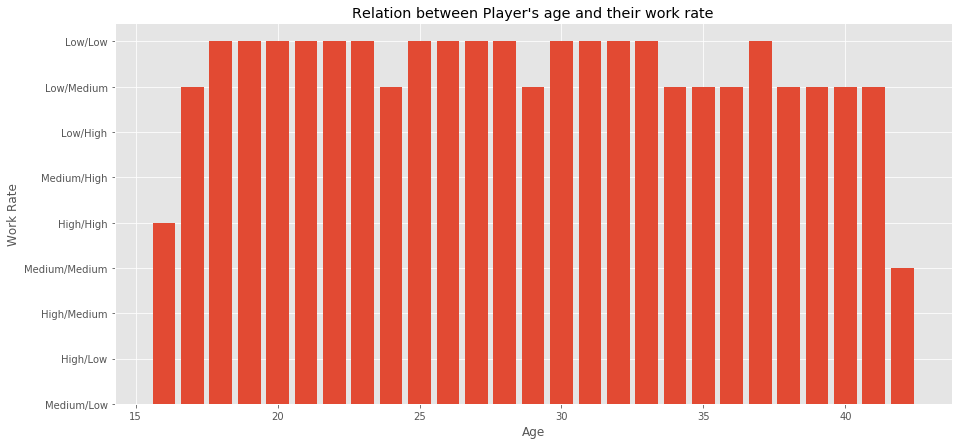

In [30]:
plt.figure(figsize=(15,7))
plt.bar(df_new['Age'],df_new['Work Rate'])
plt.xlabel('Age')
plt.ylabel('Work Rate')
plt.title("Relation between Player's age and their work rate")
plt.show()

## Relation between Player's Age and their Work Rate

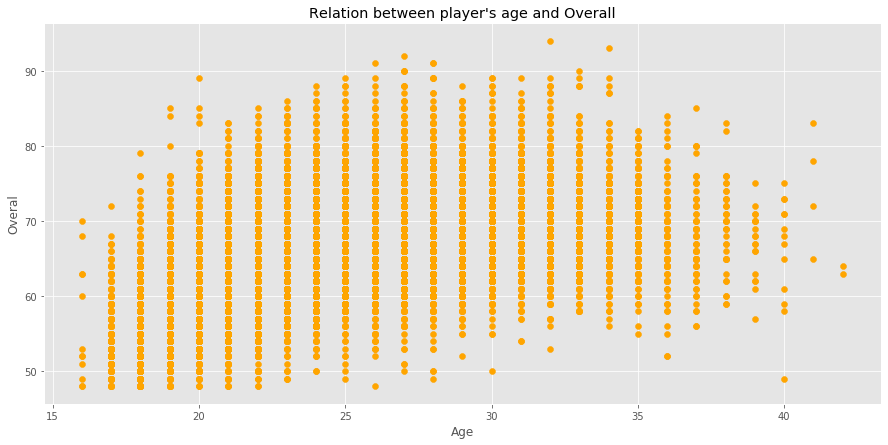

In [31]:
plt.figure(figsize=(15,7))
plt.scatter(df_new['Age'],df_new['Overall'],color='Orange',marker='o')
plt.title("Relation between player's age and Overall" )
plt.xlabel('Age')
plt.ylabel('Overal')
plt.show()

The players between Age 26-35 are tend to have higher Overall. Player in the age group 15-25 seem to have relatively low Overall

## Club

Now, we can view the players as per their CLUB'S

You only need to enter the CLUB'S name in the def club(club_name) function.

In [32]:
def club(club_name):
    club_result=df_new.loc[df['Club']==club_name]
    return club_result[['Name','Age','Overall','Value','Wage']]

In [33]:
club('Juventus')

,Name,Age,Overall,Value,Wage
1,Cristiano Ronaldo,34,93,58500000,405000
16,G. Chiellini,34,89,24500000,215000
23,P. Dybala,25,88,76500000,215000
60,W. Szczęsny,29,86,37500000,135000
65,M. Pjanić,29,86,42500000,180000
67,L. Bonucci,32,86,28500000,160000
73,M. de Ligt,19,85,50000000,76000
98,G. Higuaín,31,85,34500000,175000
99,B. Matuidi,32,85,25000000,145000
103,Alex Sandro,28,85,33000000,155000


The following figure depicts the list of Juventus player that have the highest value in the Club.

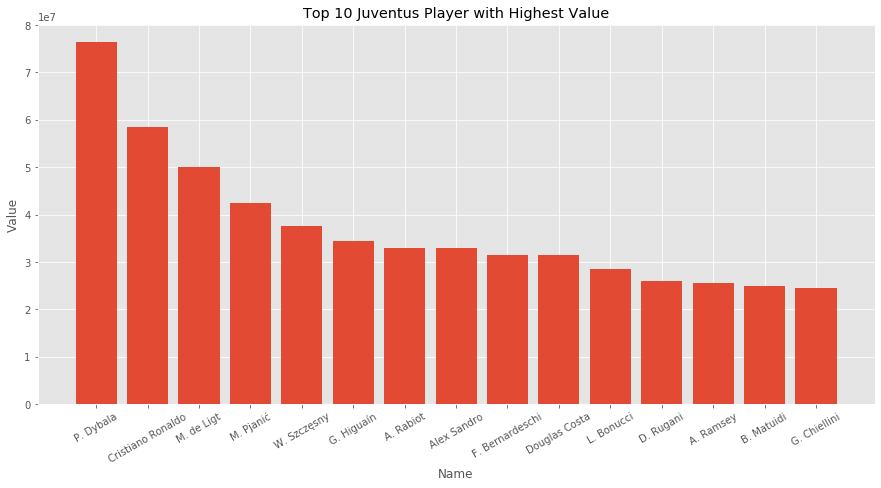

In [34]:
plt.figure(figsize=(15,7))
club=df_new.loc[df_new['Club']=='Juventus']
club=club.sort_values(by='Value',ascending=False).head(15)
plt.bar(club['Name'],club['Value'])
plt.xlabel('Name')
plt.ylabel('Value')
plt.title('Top 10 Juventus Player with Highest Value')
plt.tick_params(axis='x',rotation=30)
plt.show()

## Nationality

Now, we can view the players as per their NATIONALITY.

In [35]:
def nationality(nation_name):
    club_result=df_new.loc[df['Nationality']==nation_name]
    return club_result[['Name','Age','Overall','Value','Wage']].head(20)

In [36]:
nationality('Portugal')

,Name,Age,Overall,Value,Wage
1,Cristiano Ronaldo,34,93,58500000,405000
41,Bernardo Silva,24,87,64000000,210000
85,Bruno Fernandes,24,85,49000000,24000
86,A. Lopes,28,85,33500000,88000
112,João Cancelo,25,84,36500000,150000
128,Pepe,36,84,6500000,16000
129,João Moutinho,32,84,23500000,125000
151,Pizzi,29,84,30500000,26000
168,Gonçalo Guedes,22,83,34500000,46000
189,William Carvalho,27,83,27500000,35000


In [37]:
country=df_new['Nationality'].value_counts().head(10)
country

England        1667
Germany        1216
Spain          1035
France          984
Argentina       886
Brazil          824
Italy           732
Colombia        591
Japan           453
Netherlands     416
Name: Nationality, dtype: int64

England, Germany, Spain, France are among the countries that have the highest amount of players. 

## Top Valued players in FIFA 20

In [38]:
value=df_new.sort_values(by='Value',ascending=False)
value[['Name','Age','Nationality','Club','Value']].head(10)

,Name,Age,Nationality,Club,Value
2,Neymar Jr,27,Brazil,Paris Saint-Germain,105500000
0,L. Messi,32,Argentina,FC Barcelona,95500000
10,K. Mbappé,20,France,Paris Saint-Germain,93500000
5,K. De Bruyne,28,Belgium,Manchester City,90000000
4,E. Hazard,28,Belgium,Real Madrid,90000000
12,H. Kane,25,England,Tottenham Hotspur,83000000
9,M. Salah,27,Egypt,Liverpool,80500000
7,V. van Dijk,27,Netherlands,Liverpool,78000000
3,J. Oblak,26,Slovenia,Atlético Madrid,77500000
23,P. Dybala,25,Argentina,Juventus,76500000


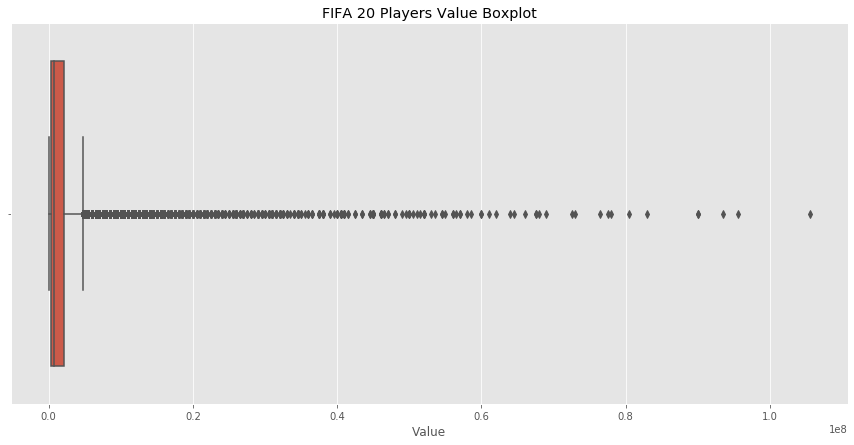

In [39]:
plt.figure(figsize=(15,7))
sns.boxplot(df_new['Value'])
plt.title('FIFA 20 Players Value Boxplot')
plt.show()

We can see that there are 6 outliers in the extreme right side as compared to the other outliers, let's see what value does the outliers store

In [40]:
value_outliers=df_new.sort_values(by='Value',ascending=False).head(6)
value_outliers[['Name','Value']]

,Name,Value
2,Neymar Jr,105500000
0,L. Messi,95500000
10,K. Mbappé,93500000
5,K. De Bruyne,90000000
4,E. Hazard,90000000
12,H. Kane,83000000


## Age

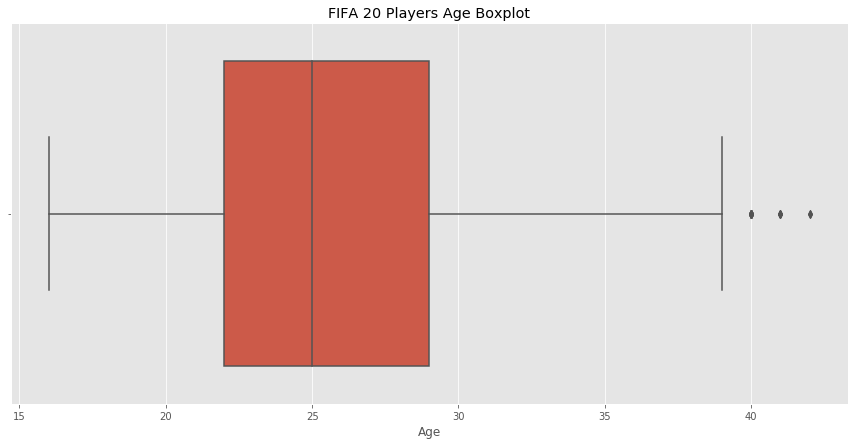

In [41]:
plt.figure(figsize=(15,7))
sns.boxplot(df_new['Age'])
plt.title('FIFA 20 Players Age Boxplot')
plt.show()

Age 42,41,40 is considered as outliers. Since, the values for those age is less.

In [42]:
age=df_new.sort_values(by='Age',ascending=False).head(10)
age

,Name,Nationality,Club,Age,Overall,Player Positions,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Team Position,Free Kick,pace,shooting,passing,dribbling,defending,physic
13003,H. Sulaimani,Saudi Arabia,Al Ahli,42,63,LB,Left,0,5000,High/Medium,1,3,LB,69,47.0,53.0,68.0,64.0,64.0,72.0
11832,C. Muñoz,Argentina,CD Universidad de Concepción,42,64,GK,Right,50000,1000,Medium/Medium,1,1,GK,20,69.0,54.0,58.0,64.0,56.0,66.0
200,G. Buffon,Italy,Juventus,41,83,GK,Right,2600000,58000,Medium/Medium,4,1,SUB,13,69.0,54.0,58.0,64.0,56.0,66.0
3706,C. Lucchetti,Argentina,Atlético Tucumán,41,72,GK,Right,325000,5000,Medium/Medium,1,1,GK,30,69.0,54.0,58.0,64.0,56.0,66.0
10665,F. Kippe,Norway,Lillestrøm SK,41,65,CB,Left,0,1000,Medium/High,1,2,LCB,53,25.0,52.0,49.0,34.0,61.0,73.0
868,Hilton,Brazil,Montpellier HSC,41,78,CB,Right,0,21000,Low/Medium,2,3,CB,48,36.0,51.0,67.0,66.0,80.0,71.0
2965,Cifuentes,Spain,Cádiz CF,40,73,GK,Right,400000,4000,Medium/Medium,1,1,GK,12,69.0,54.0,58.0,64.0,56.0,66.0
15812,M. Gurski,Germany,SpVgg Unterhaching,40,59,GK,Right,20000,1000,Medium/Medium,1,1,RES,9,69.0,54.0,58.0,64.0,56.0,66.0
8359,F. Cubero,Argentina,Vélez Sarsfield,40,67,"CB, RB",Right,0,3000,Low/High,1,2,RES,44,41.0,43.0,63.0,53.0,63.0,69.0
2963,D. Dainelli,Italy,Livorno,40,73,CB,Right,0,2000,Low/Medium,2,2,SUB,31,32.0,33.0,43.0,51.0,76.0,65.0


## Player Wage

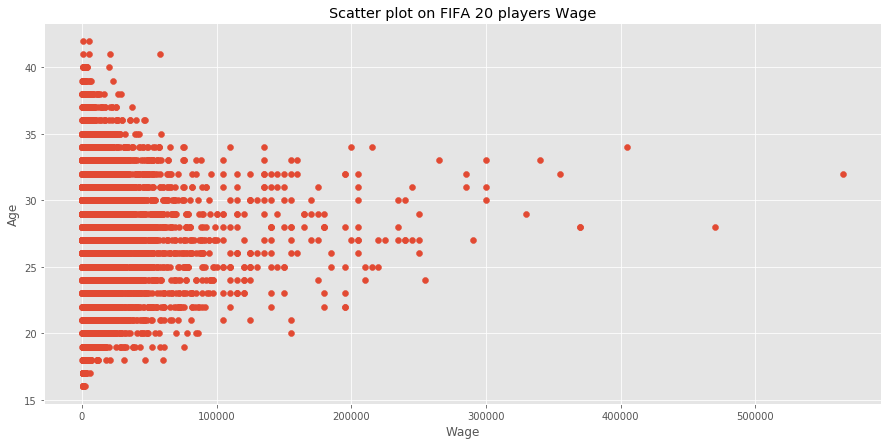

In [43]:
plt.figure(figsize=(15,7))
plt.scatter(x=df_new['Wage'],y=df_new['Age'])
plt.xlabel('Wage')
plt.ylabel('Age')
plt.title('Scatter plot on FIFA 20 players Wage')
plt.show()

We can see that there are Three outliers in the right side, let's see what value does the outliers store.

In [44]:
wage=df_new.sort_values(by='Wage',ascending=False).head(3)
wage

,Name,Nationality,Club,Age,Overall,Player Positions,Preferred Foot,Value,Wage,Work Rate,International Reputation,Skill Moves,Team Position,Free Kick,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,Argentina,FC Barcelona,32,94,"RW, CF, ST",Left,95500000,565000,Medium/Low,5,4,RW,94,87.0,92.0,92.0,96.0,39.0,66.0
4,E. Hazard,Belgium,Real Madrid,28,91,"LW, CF",Right,90000000,470000,High/Medium,4,4,LW,79,91.0,83.0,86.0,94.0,35.0,66.0
1,Cristiano Ronaldo,Portugal,Juventus,34,93,"ST, LW",Right,58500000,405000,High/Low,5,5,LW,76,90.0,93.0,82.0,89.0,35.0,78.0


## Work Rate

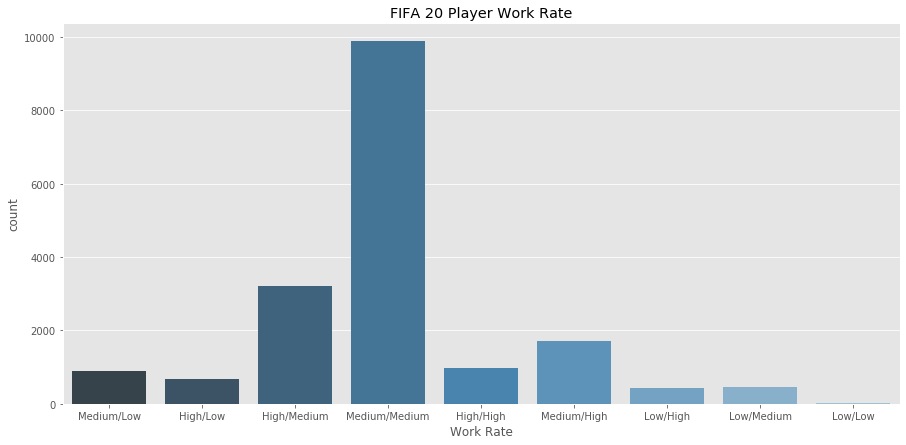

In [45]:
plt.figure(figsize=(15,7))
sns.countplot(df_new['Work Rate'],palette='Blues_d')
plt.title('FIFA 20 Player Work Rate')
plt.show()

## Box Plot

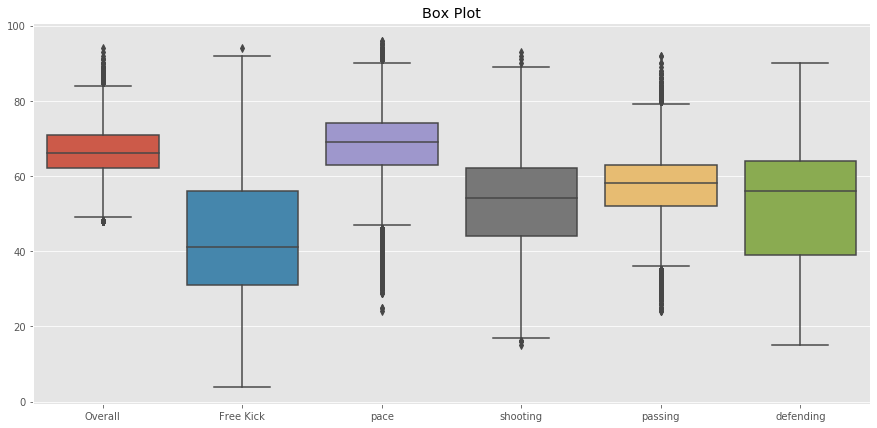

In [46]:
plt.figure(figsize=(15,7))
box_plot=df_new[['Overall','Free Kick','pace','shooting','passing','defending']]
sns.boxplot(data=box_plot)
plt.title('Box Plot')
plt.show()

In [47]:
players=df_new[['Name','Free Kick','pace','shooting','passing','dribbling','defending','physic']]
players

,Name,Free Kick,pace,shooting,passing,dribbling,defending,physic
0,L. Messi,94,87.0,92.0,92.0,96.0,39.0,66.0
1,Cristiano Ronaldo,76,90.0,93.0,82.0,89.0,35.0,78.0
2,Neymar Jr,87,91.0,85.0,87.0,95.0,32.0,58.0
3,J. Oblak,14,69.0,54.0,58.0,64.0,56.0,66.0
4,E. Hazard,79,91.0,83.0,86.0,94.0,35.0,66.0
...,...,...,...,...,...,...,...,...
18273,Shao Shuai,21,57.0,23.0,28.0,33.0,47.0,51.0
18274,Xiao Mingjie,29,58.0,24.0,33.0,35.0,48.0,48.0
18275,Zhang Wei,32,54.0,35.0,44.0,45.0,48.0,51.0
18276,Wang Haijian,39,59.0,35.0,47.0,47.0,45.0,52.0


In [48]:
def details(row,title):

    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = []
    N = len(categories) - len(coulumnDontUseGraph)
    
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar')
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [ ]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= 'red', alpha=0.5)
    axes_coords = [0, 0, 1, 1]

   
    plt.title(title, size=25, color= basic_color)

In [49]:
def graphpolar(id=0):
    if 0<=id<len(df_new.index):
        details(row=players.index[id],
               title=players.Name[id])
    else:
        print('Enter a correct number')

## L. Messi Stats

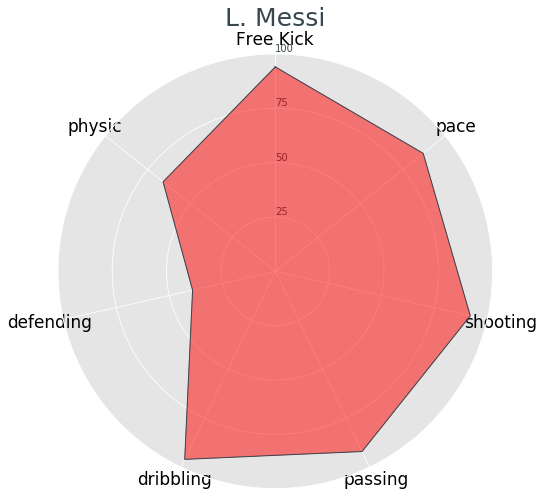

In [50]:
graphpolar(0)

## Cristiano Ronaldo stats

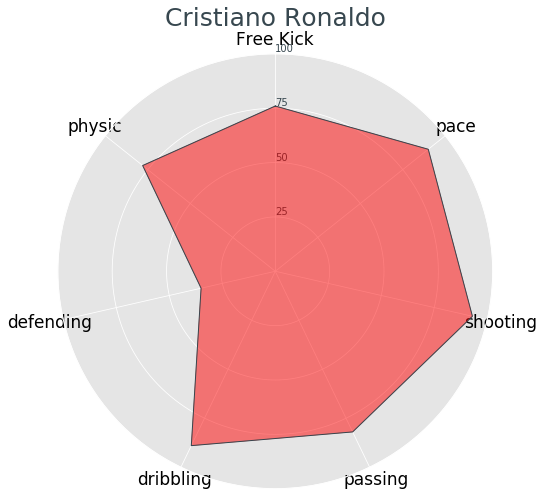

In [51]:
graphpolar(1)

## J. Oblak stats

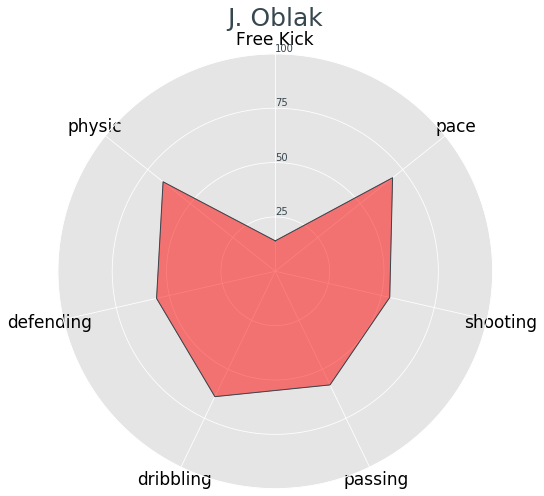

In [52]:
graphpolar(3)

## V. van Dijk stats

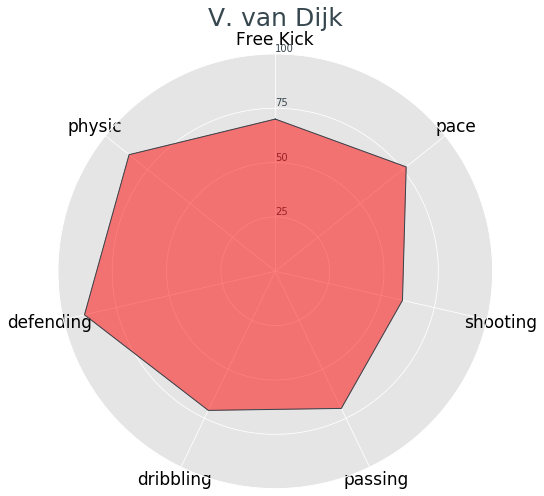

In [53]:
graphpolar(7)

## Top 15 Youngest Players

In [54]:
young=df_new.sort_values(by='Age').head(15)
young=young[['Name','Age','Club','Nationality']]
young

,Name,Age,Club,Nationality
18171,J. Starbuck,16,Grimsby Town,England
4764,A. Hložek,16,Sparta Praha,Czech Republic
18243,E. Sartorius,16,Lincoln City,England
17827,D. Burns,16,St. Patrick's Athletic,Northern Ireland
17614,D. Obbekjær,16,Odense Boldklub,Denmark
17782,S. Anderson,16,Colorado Rapids,United States
18242,R. Wikberg,16,Östersunds FK,Sweden
18031,O. Stefánsson,16,IFK Norrköping,Iceland
14626,A. Velasco,16,Independiente,Argentina
12160,S. Esposito,16,Inter,Italy


## Top 15 Eldest Players

In [55]:
old=df_new.sort_values(by='Age',ascending=False).head(15)
old=old[['Name','Age','Club','Nationality']]
old

,Name,Age,Club,Nationality
13003,H. Sulaimani,42,Al Ahli,Saudi Arabia
11832,C. Muñoz,42,CD Universidad de Concepción,Argentina
200,G. Buffon,41,Juventus,Italy
3706,C. Lucchetti,41,Atlético Tucumán,Argentina
10665,F. Kippe,41,Lillestrøm SK,Norway
868,Hilton,41,Montpellier HSC,Brazil
2965,Cifuentes,40,Cádiz CF,Spain
15812,M. Gurski,40,SpVgg Unterhaching,Germany
8359,F. Cubero,40,Vélez Sarsfield,Argentina
2963,D. Dainelli,40,Livorno,Italy


In [56]:
d=df['joined']
d.head()

0    01-07-2004
1    10-07-2018
2    03-08-2017
3    16-07-2014
4    01-07-2019
Name: joined, dtype: object

## Top 15 Players for most year at a CLUB in FIFA 20

In [57]:
import datetime
now=datetime.datetime.now()
df_new['Joined_Year']=df.joined.dropna().map(lambda x: x.split('-')[2])
df_new['Years For Club']=(df_new.Joined_Year.dropna().map(lambda x:now.year-int(x))).astype('int')
member=df_new[['Name','Age','Club','Years For Club']].sort_values(by='Years For Club',ascending=False)
member.set_index('Name',inplace=True)
member.head(15)

C:\Users\Shloka Daga SD03\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Shloka Daga SD03\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Age,Club,Years For Club
Name,,,
M. Al Shalhoub,38,Al Hilal,22.0
H. Sogahata,39,Kashima Antlers,22.0
M. Wölfli,36,BSC Young Boys,20.0
C. Källqvist,35,BK Häcken,20.0
Y. Endo,39,Gamba Osaka,19.0
F. Kippe,41,Lillestrøm SK,18.0
I. Akinfeev,33,PFC CSKA Moscow,18.0
D. Lewington,35,Milton Keynes Dons,18.0
Y. Kurihara,35,Yokohama F. Marinos,18.0


## Players with Highest Overall at each Position

In [58]:
df_new.iloc[df_new.groupby(df_new['Team Position'])['Overall'].idxmax()][['Team Position', 'Name', 'Age', 'Club', 'Nationality']]

,Team Position,Name,Age,Club,Nationality
2,CAM,Neymar Jr,27,Paris Saint-Germain,Brazil
126,CB,S. de Vrij,27,Inter,Netherlands
21,CDM,Sergio Busquets,30,FC Barcelona,Spain
46,CF,K. Benzema,31,Real Madrid,France
123,CM,Luis Alberto,26,Lazio,Spain
3,GK,J. Oblak,26,Atlético Madrid,Slovenia
306,LAM,Taison,31,Shakhtar Donetsk,Brazil
51,LB,Jordi Alba,30,FC Barcelona,Spain
7,LCB,V. van Dijk,27,Liverpool,Netherlands
33,LCM,David Silva,33,Manchester City,Spain
